In [93]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data = pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


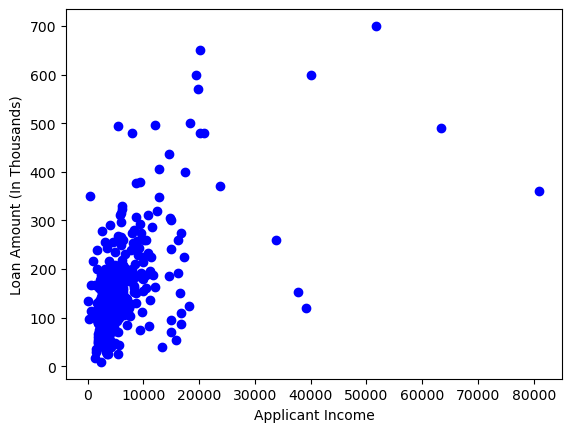

In [95]:
X = data[["ApplicantIncome", "LoanAmount"]]
# Visualize data point
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (In Thousands)")
plt.show()

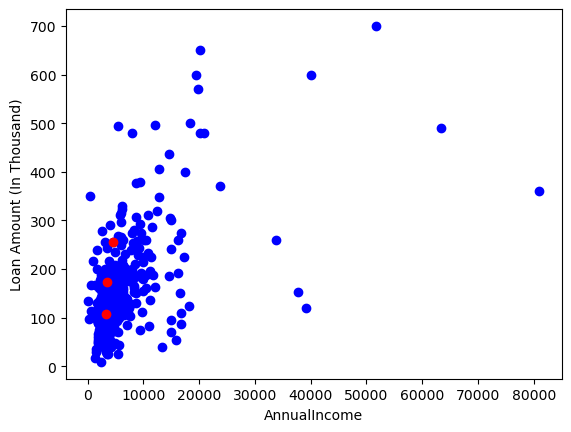

In [103]:
# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()

In [104]:
Centroids

,ApplicantIncome,LoanAmount,1,2,3,Cluster
608,3232,108.0,12946.740237,35.376701,4114.054997,2
159,4583,255.0,11594.251676,1324.217358,2763.082742,2
606,3400,173.0,12777.879366,144.885395,3945.303184,2


In [105]:

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

4199.518208831755
4776.761475335266
5206.311874469542
5315.389414139549
4261.293888120369
6477.045215488502
11910.908040798073
7719.986626543978
777.1747280884897
367.54597654146403
191.45406580792883
130.24710842131452
137.05470379223112
0.0


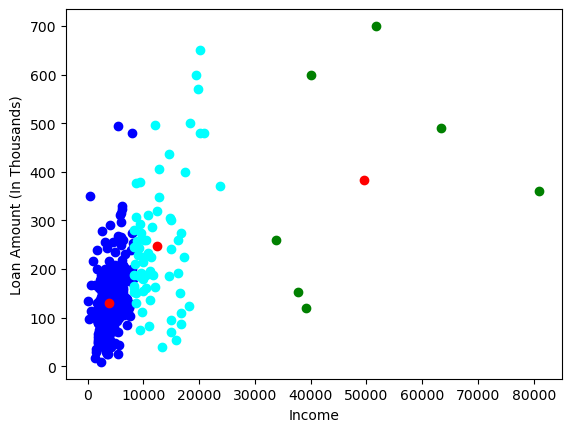

In [106]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

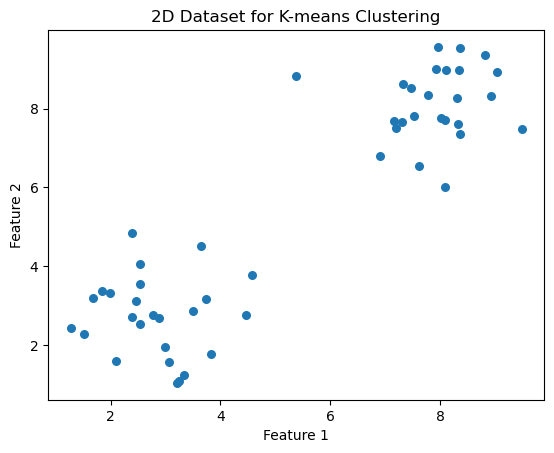

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generating 2D dataset with two clusters
cluster1 = np.random.normal(loc=[3, 3], scale=[1, 1], size=(25, 2))
cluster2 = np.random.normal(loc=[8, 8], scale=[1, 1], size=(25, 2))

dataset = np.vstack([cluster1, cluster2])

# Shuffle the dataset
np.random.shuffle(dataset)

# Plotting the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], s=30)
plt.title('2D Dataset for K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [166]:
k = int(input("Enter number of clusters:"))

Enter number of clusters:2


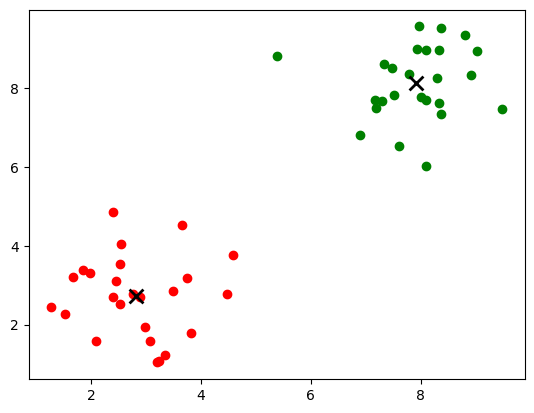

In [171]:
data = dataset

# Number of clusters
# k = 3

# Number of iterations
max_iter = 100

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Initialize centroids randomly
centroids = data[np.random.choice(data.shape[0], k, replace=False)]
# print("Centroids are: ")
# print(centroids)

i = 0
# Main K-means algorithm
for _ in range(max_iter):
    # Assign each point to the nearest centroid using minimum distance at index which specified
    clusters = [[] for _ in range(k)]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_assignment = np.argmin(distances)
        clusters[cluster_assignment].append(point)

    # Update centroids using means so that new controid will be in center of cluster
    new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]

    # Check for convergence if centroids not changed
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids
#     print(new_centroids)

# Plotting the results
colors = ['r', 'g','b','y']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i])

# Plotting centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=2, color='black')
plt.show()


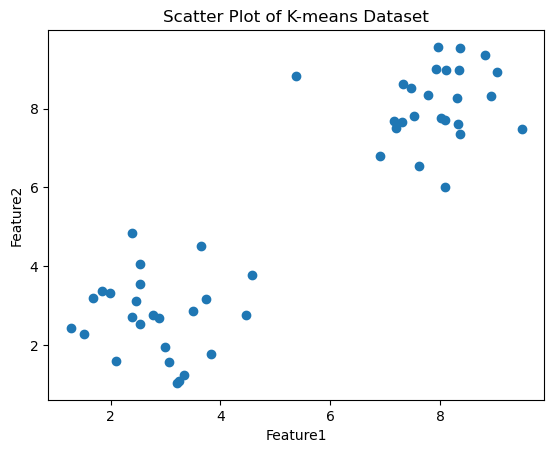

Enter number of clusters: 3
[8.847647926814448, 2.5759524083231766, 1.3947484458485864]
[8.78135601513557, 0.7885005403943873, 1.2842725644221622]
[9.32958585376435, 0.0, 2.0668098556113224]
[10.10337922785421, 1.663113910410327, 2.2845017896554705]
[9.749363035273033, 2.630221058408918, 2.1429596367193215]
[1.376171264540719, 7.99638287620617, 6.574845130481546]
[10.115368249427226, 0.8565646243560422, 2.570313913118133]
[2.1420567218258637, 7.189107245107685, 5.738347086232018]
[0.9946098988128885, 8.33831490995627, 6.832065638491792]
[0.9346691315885383, 8.636984428465281, 7.252992956487062]
[9.079951396658204, 0.25175338471286235, 1.9004763423823745]
[1.5529612585457724, 7.809119452906668, 6.269730554255549]
[2.785727709333507, 6.811028411113189, 5.128007680981818]
[9.568117357919132, 2.576071274143884, 1.9742951075914064]
[7.7865940854877636, 1.8078101796778638, 2.1497726131462858]
[1.7375679947491707, 7.826685595116439, 6.5150894275016915]
[1.4941685199867225, 7.985732245046488, 

[7.549251802685285, 2.0979885467267714, 0.4747254051256203]
[7.409151752058901, 0.19004376317955737, 1.4346234246256129]
[7.950029773931132, 0.6391893718506827, 2.106557407773944]
[8.751876330208022, 1.6596981082879012, 1.4626809154338334]
[8.446494775422213, 2.3399085415256753, 1.029348537005004]
[0.2632651059604573, 7.495404505212892, 7.607747094824116]
[8.739039660254765, 1.3051892560414486, 2.2172226794682253]
[0.7612688329196924, 6.677380096238604, 6.7701793236642365]
[0.4101635438488513, 7.817612713312913, 7.835871662304804]
[0.8624068917614166, 8.147880356293811, 8.291498072738932]
[7.700179410631692, 0.48255081333643307, 2.0641632555764087]
[0.37440481708005446, 7.278542381611967, 7.2666239682411495]
[1.618781636829568, 6.243459525951209, 6.076155207843021]
[8.265103005912042, 2.247808306381162, 0.863221133645598]
[6.409860879504585, 1.6216701583856843, 2.9596517566043103]
[0.7598960550802606, 7.352629015217676, 7.5759745256399835]
[0.6596307046552359, 7.44113711044288, 7.35640

[7.549251802685308, 2.0981720375356194, 0.47222177202210597]
[7.4091517520589285, 0.18992262245418903, 1.4377133590100517]
[7.95002977393116, 0.6431697652811186, 2.107898705782823]
[8.751876330208049, 1.66430149048371, 1.457569803110027]
[8.446494775422236, 2.342226502803529, 1.021768503375345]
[0.263265105960461, 7.489841324678417, 7.615233379993878]
[8.739039660254791, 1.3106808170814022, 2.215545994354183]
[0.7612688329197201, 6.671830657259432, 6.777667862112712]
[0.4101635438488226, 7.812083023262808, 7.843239454645093]
[0.8624068917614005, 8.142306170070942, 8.299001659197145]
[7.700179410631719, 0.4849243543855463, 2.066393138425431]
[0.3744048170800579, 7.273034954097408, 7.273968625532961]
[1.6187816368295833, 6.238092992449727, 6.0833104367583015]
[8.265103005912065, 2.2497753913143157, 0.8557594134678088]
[6.409860879504613, 1.617331402754037, 2.965288907542661]
[0.7598960550802744, 7.347046864770135, 7.583560572542253]
[0.6596307046552273, 7.435673573545249, 7.3636372684406

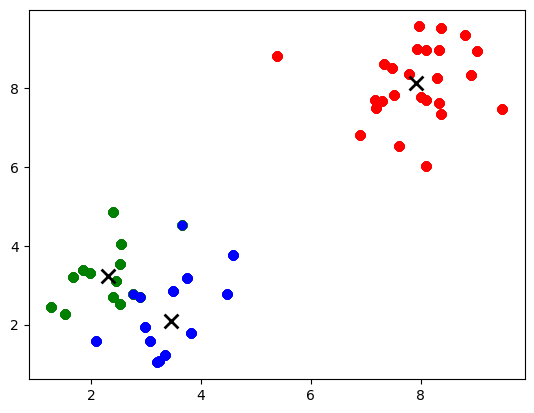

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
dataset = pd.read_csv("kmeans_dataset.csv")
df = dataset
# Plotting the dataset
plt.scatter(df['Feature1'], df['Feature2'])
plt.title('Scatter Plot of K-means Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Convert DataFrame to NumPy array for K-means
data = dataset.values

# Number of clusters
# k = 3
k = int(input("Enter number of clusters: "))

# Number of iterations
max_iter = 100

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Initialize centroids randomly
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

# Initialize clusters before the loop
clusters = [[] for _ in range(k)]

# Main K-means algorithm
for _ in range(max_iter):
    # Assign each point to the nearest centroid using minimum distance at index which specifies cluster number
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_assignment = np.argmin(distances)
        clusters[cluster_assignment].append(point)

    # Update centroids using means so that new centroid will be in the center of the cluster
    new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]

    # Check for convergence if centroids not changed
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

# Plotting the results
colors = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i])

# Plotting centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=2, color='black')
plt.show()
